In [29]:
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [69]:
def find_significant_correlations(genes, correlations, alpha=0.025, correction=500*5000):
    mu, sigma = np.mean(correlations), np.std(correlations)
    t = stats.t(df=998, loc=mu, scale=sigma)
    crit = t.isf(alpha / (correction))
    sig_corrs = corrs >= crit
    return genes[sig_corrs], corrs[sig_corrs]

In [56]:
data1 = pd.read_csv("./gene_snp_scores_1_101.txt", index_col=0)
data2 = pd.read_csv("./gene_snp_scores_101_200.txt", index_col=0)
data3 = pd.read_csv("./gene_snp_scores_200_301.txt", index_col=0)
data4 = pd.read_csv("./gene_snp_scores_301_401.txt", index_col=0)
data5 = pd.read_csv("./gene_snp_scores_401_501.txt", index_col=0)
data = pd.concat([data1, data2, data3, data4, data5])

In [93]:
snp_significant = []
for snp in data.index:
    corrs = data.loc[snp].values.astype(np.float32)
    genes, rscores = find_significant_correlations(data.columns, corrs, alpha=0.00001)
    snp_significant.append((snp, genes, rscores))

In [95]:
snp_sig_order = sorted(snp_significant, key=lambda x: len(x[1]), reverse=True)

In [96]:
snp_sig_order


[('SNP_119',
  Index(['Gene_AIU28', 'Gene_XMY78', 'Gene_PDA21', 'Gene_LKJ65', 'Gene_TXM58',
         'Gene_BAF02', 'Gene_HXS05', 'Gene_FZA89', 'Gene_TYZ45', 'Gene_UUH92',
         'Gene_FZL13', 'Gene_LOE40', 'Gene_WFM86', 'Gene_LQE83', 'Gene_EVL77',
         'Gene_AGR67', 'Gene_UDL16', 'Gene_MQT38', 'Gene_FVH87', 'Gene_CLI02',
         'Gene_YSN10', 'Gene_MEN85', 'Gene_UJU38', 'Gene_AOG34', 'Gene_MST69',
         'Gene_ZUG63', 'Gene_NUY56', 'Gene_WNN25', 'Gene_WOZ21', 'Gene_OHM64',
         'Gene_TAY33', 'Gene_JNZ42'],
        dtype='object'),
  array([0.04919804, 0.05953385, 0.04154909, 0.0461356 , 0.07659675,
         0.05887127, 0.03648105, 0.06123998, 0.04084376, 0.0501272 ,
         0.052016  , 0.03980747, 0.04079141, 0.04736685, 0.07626212,
         0.04156212, 0.03476589, 0.03701416, 0.04772754, 0.03988926,
         0.05191638, 0.03913976, 0.03908808, 0.06886759, 0.03261008,
         0.04097056, 0.05815302, 0.05215547, 0.04795393, 0.06188564,
         0.04488667, 0.04319642], dt

In [103]:
len(list(filter(lambda x: len(x[1]) > 7, snp_sig_order)))

64

In [146]:
import matplotlib.pyplot as plt

def plot_corr(gene, snp, alpha=0.00001, correction=500*5000):
    corrs = data.loc[snp].values.astype(np.float32)
    mu, sigma = np.mean(corrs), np.std(corrs)
    t = stats.t(df=998, loc=mu, scale=sigma)
    crit = t.isf(alpha / (correction))
    plt.figure(figsize=(12, 8))
    r2 = data.loc[snp, gene]
    x = np.linspace(-max(crit, r2) * 1.15, max(crit, r2) * 1.15, 10000)
    plt.plot(x, t.pdf(x))
    plt.xlabel("Correlation")
    plt.ylabel("t(df={}, $\mu={:.3e}$, $\sigma={:.3e}$) PDF".format(998, mu, sigma))
    plt.axvline(x=crit, label='critical value={}'.format(crit), c="black")
    plt.axvline(x=r2, label="$R^2={}$".format(r2), c="red")
    plt.title("({}, {}) correlation".format(snp, gene))

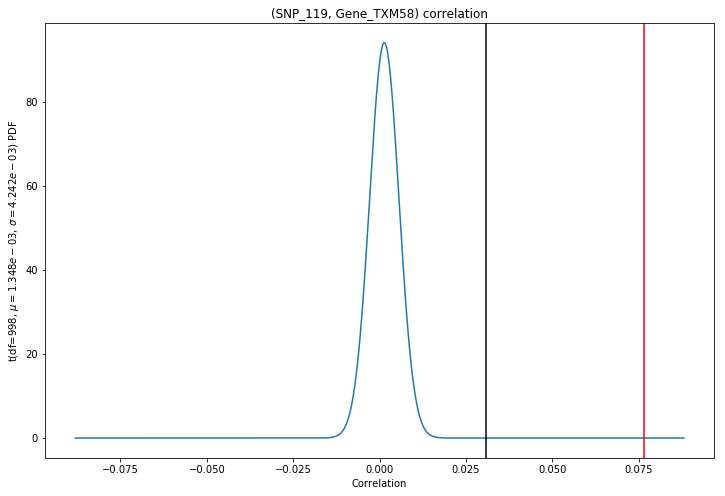

In [140]:
plot_corr("Gene_TXM58", "SNP_119")

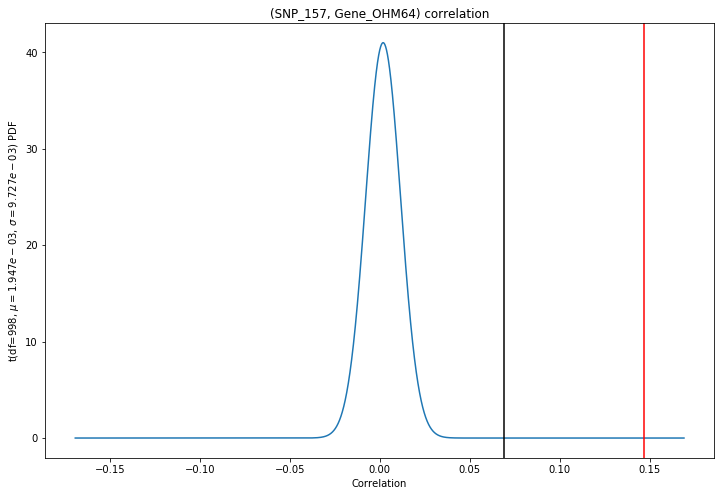

In [141]:
plot_corr("Gene_OHM64", "SNP_157")

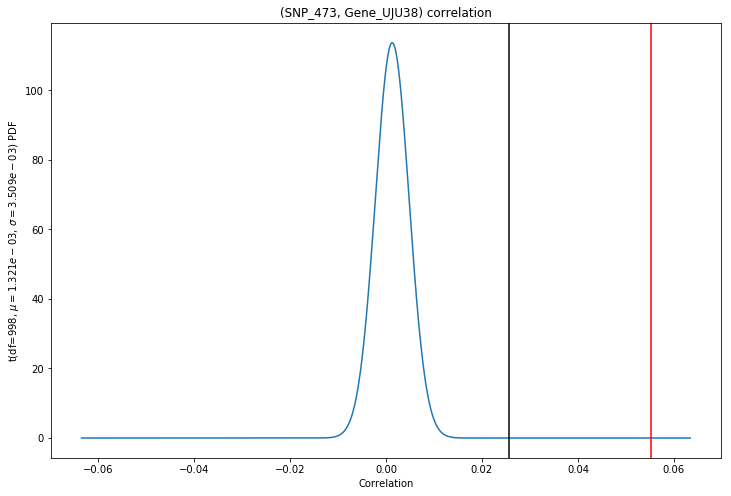

In [148]:
plot_corr("Gene_UJU38", "SNP_473")

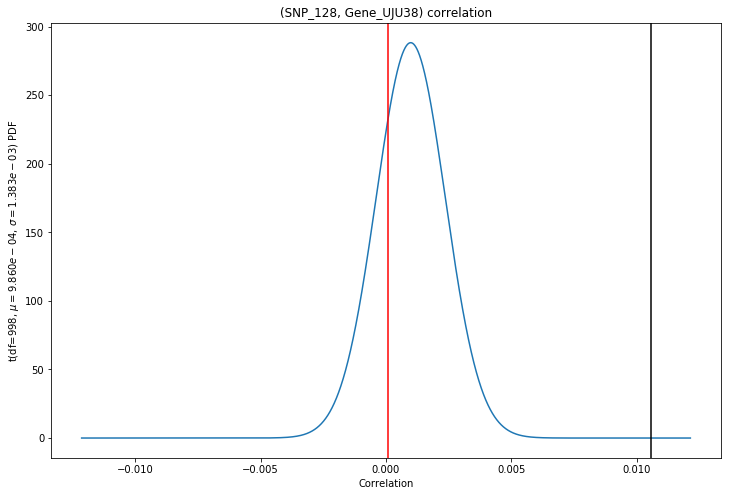

In [149]:
plot_corr("Gene_UJU38", "SNP_128")